In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_df = pd.read_csv('data/titanic-dataset-train.csv')
test_df = pd.read_csv('data/titanic-dataset-test.csv')

df = pd.concat([train_df, test_df])
df = df.reset_index().drop('index', axis=1)

In [3]:
df['CabinLetter'] = df['Cabin'].dropna().apply(lambda x : x[0])

In [4]:
df = df.reindex(columns=['PassengerId','Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Pclass', 'Embarked', 'SibSp', 'Parch', 'Cabin', 'CabinLetter', 'Survived'])

In [5]:
df.head()

,PassengerId,Name,Sex,Age,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Cabin,CabinLetter,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,3,S,1,0,NaN,NaN,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,C,1,0,C85,C,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,3,S,0,0,NaN,NaN,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1,S,1,0,C123,C,1.0
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,3,S,0,0,NaN,NaN,0.0


# Exploratory Data Analysis

In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
df.shape

(1309, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Name         1309 non-null   object 
 2   Sex          1309 non-null   object 
 3   Age          1046 non-null   float64
 4   Ticket       1309 non-null   object 
 5   Fare         1308 non-null   float64
 6   Pclass       1309 non-null   int64  
 7   Embarked     1307 non-null   object 
 8   SibSp        1309 non-null   int64  
 9   Parch        1309 non-null   int64  
 10  Cabin        295 non-null    object 
 11  CabinLetter  295 non-null    object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [10]:
df.describe()

,PassengerId,Age,Fare,Pclass,SibSp,Parch,Survived
count,1309.000000,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,655.000000,29.881138,33.295479,2.294882,0.498854,0.385027,0.383838
std,378.020061,14.413493,51.758668,0.837836,1.041658,0.865560,0.486592
min,1.000000,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,7.895800,2.000000,0.000000,0.000000,0.000000
50%,655.000000,28.000000,14.454200,3.000000,0.000000,0.000000,0.000000
75%,982.000000,39.000000,31.275000,3.000000,1.000000,0.000000,1.000000
max,1309.000000,80.000000,512.329200,3.000000,8.000000,9.000000,1.000000


In [11]:
df.isna().sum()

PassengerId       0
Name              0
Sex               0
Age             263
Ticket            0
Fare              1
Pclass            0
Embarked          2
SibSp             0
Parch             0
Cabin          1014
CabinLetter    1014
Survived        418
dtype: int64

In [12]:
df.duplicated().sum()

0

# Visualizations

### Features correlation

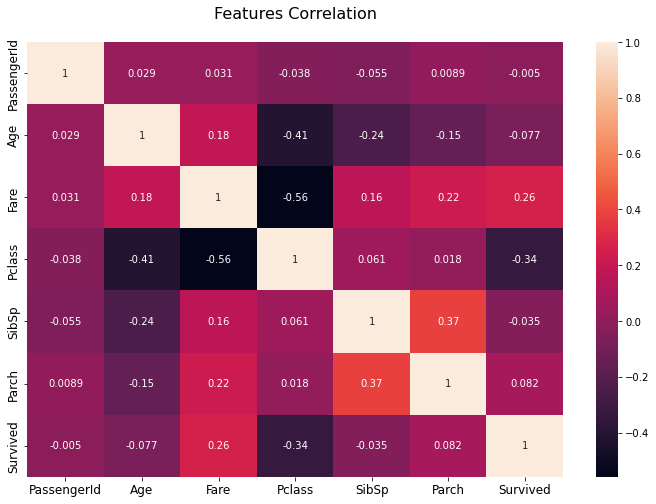

In [13]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

plt.title('Features Correlation\n', fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.show()

### Outliers detection

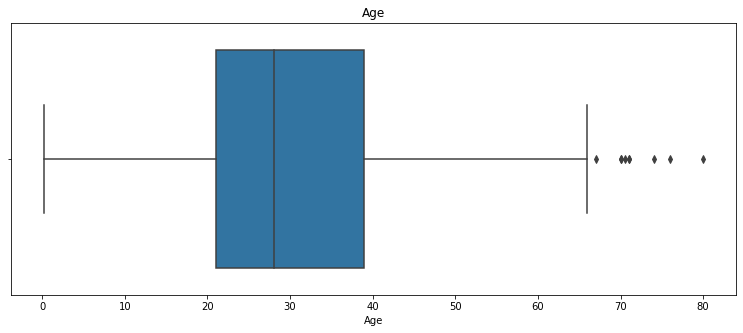

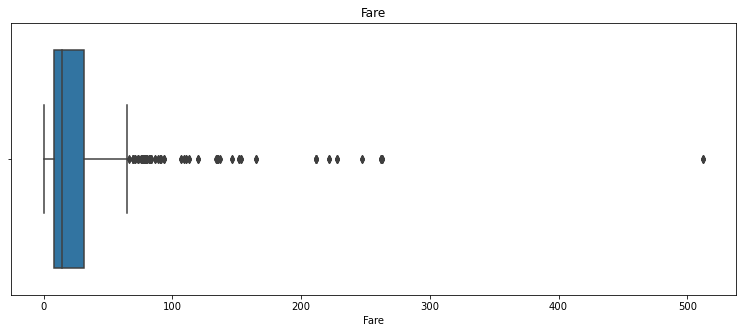

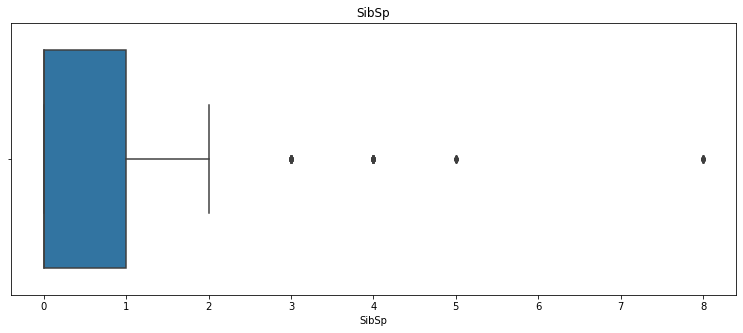

In [14]:
for col in ['Age', 'Fare', 'SibSp']:
    plt.figure(figsize=(13,5))
    plt.title(col)
    ax = sns.boxplot(data=df, x=col, hue='Survived')
    plt.show()

### Survival analysis based on gender

In [15]:
df.head()

,PassengerId,Name,Sex,Age,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Cabin,CabinLetter,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,3,S,1,0,NaN,NaN,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,C,1,0,C85,C,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,3,S,0,0,NaN,NaN,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1,S,1,0,C123,C,1.0
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,3,S,0,0,NaN,NaN,0.0


In [16]:
females = df[(df.Sex == 'female') & (df.Survived == 1.0)].Survived
males = df[(df.Sex == 'male') & (df.Survived == 1.0)].Survived

In [17]:
females_pct = females.sum()/ (males.sum() + females.sum())
males_pct = males.sum()/ (males.sum() + females.sum())

In [18]:
females_pct, males_pct

(0.6812865497076024, 0.31871345029239767)

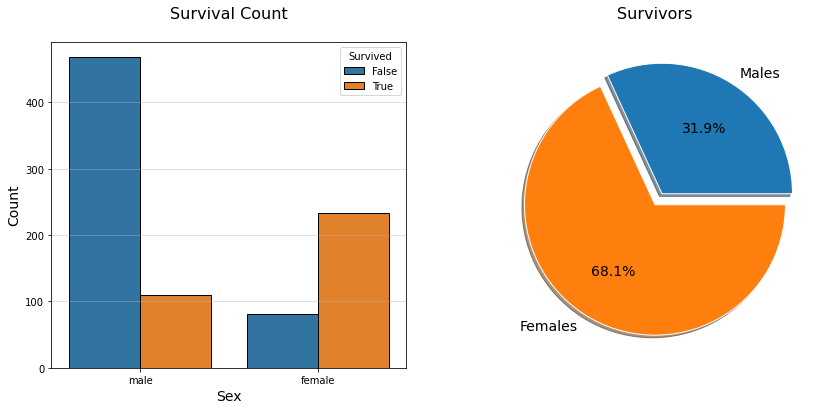

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))

sns.countplot(data=df, x='Sex', hue='Survived', ax=ax1, edgecolor='black')
ax1.set_title('Survival Count\n', fontsize=16)
ax1.set_xlabel('Sex', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.grid(axis='y', alpha=0.5)
ax1.legend(title='Survived' ,labels=['False', 'True'])

ax2.pie([males_pct, females_pct],labels=['Males', 'Females'],
        shadow=True, 
        wedgeprops={'edgecolor':'white'},
        autopct='%1.1f%%', explode=[0.1, 0],
        textprops={'fontsize':14})

ax2.set_title('Survivors\n', fontsize=16)

plt.show()

### Survival analysis based on Pclass

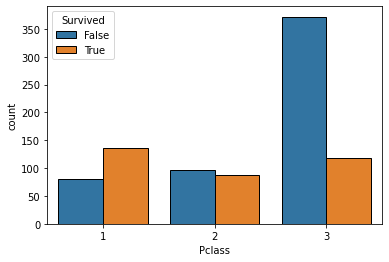

In [20]:
sns.countplot(data=df, x='Pclass', hue='Survived', edgecolor='black')
plt.legend(title='Survived', labels=['False', 'True'])
plt.show()

### Survival analysis based on Embarked

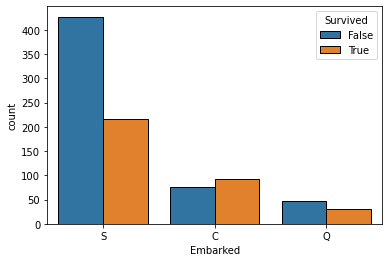

In [21]:
sns.countplot(data=df, x='Embarked', hue='Survived', edgecolor='black')
plt.legend(title='Survived', labels=['False', 'True'])
plt.show()

### Survival analysis based on CabinLetter

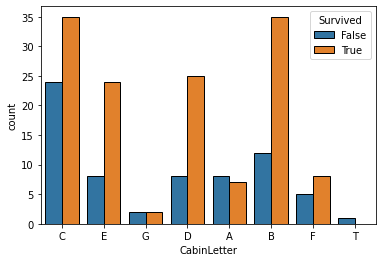

In [22]:
sns.countplot(data=df, x='CabinLetter', hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived', labels=['False', 'True'])
plt.show()

### Survival analysis based on SibSp

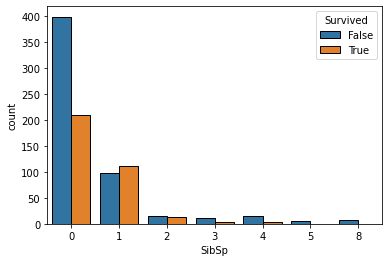

In [23]:
sns.countplot(data=df, x='SibSp', hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived', labels=['False', 'True'])
plt.show()

### Survival analysis based on Parch

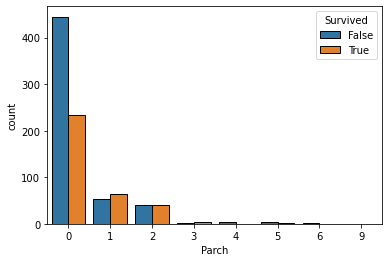

In [24]:
sns.countplot(data=df, x='Parch', hue='Survived', edgecolor='black')
plt.legend(loc='upper right', title='Survived', labels=['False', 'True'])
plt.show()

### Survival analysis based on age and fare

In [25]:
survived_data = df[df.Survived == 1.0]
dead_data = df[df.Survived == 0.0]

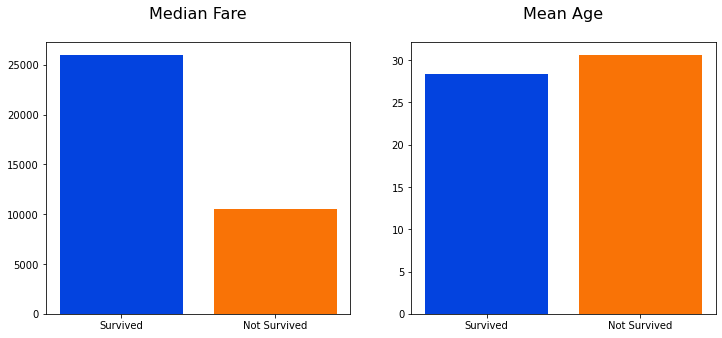

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

ax1.bar(['Survived', 'Not Survived'], [survived_data.Fare.median()*1000, dead_data.Fare.median()*1000], color=['#0343DF', '#F97306'])
ax1.set_title('Median Fare\n', fontsize=16)

ax2.bar(['Survived', 'Not Survived'], [survived_data.Age.mean(), dead_data.Age.mean()], color=['#0343DF', '#F97306'])
ax2.set_title('Mean Age\n', fontsize=16)

plt.show()

### Fare analysis based on Pclass

<Figure size 1584x432 with 0 Axes>

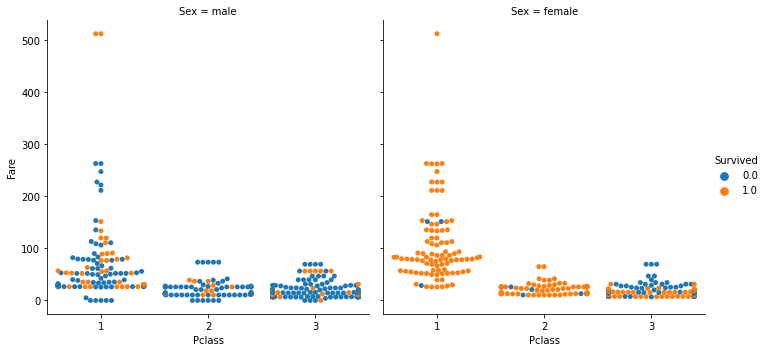

In [27]:
plt.figure(figsize=(22,6))
sns.catplot(data=df, x='Pclass', y='Fare', hue='Survived', col='Sex', kind='swarm')
plt.show()

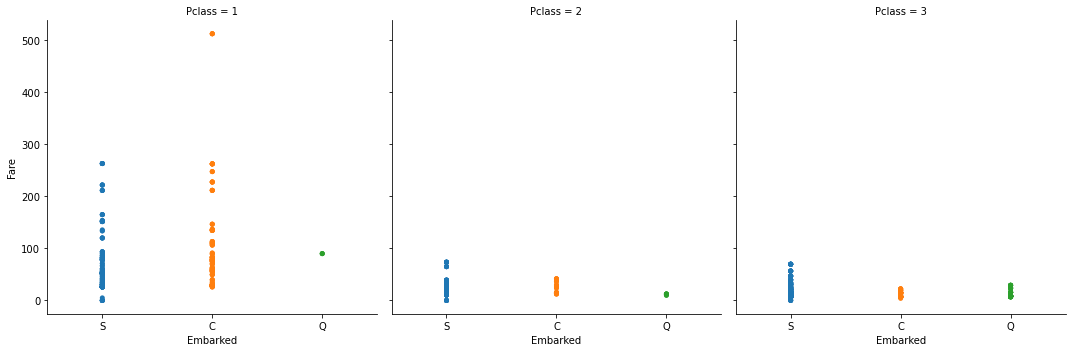

In [28]:
sns.catplot(data=df, x='Embarked', y='Fare', col='Pclass', jitter=False)

### Fare analysis based on age

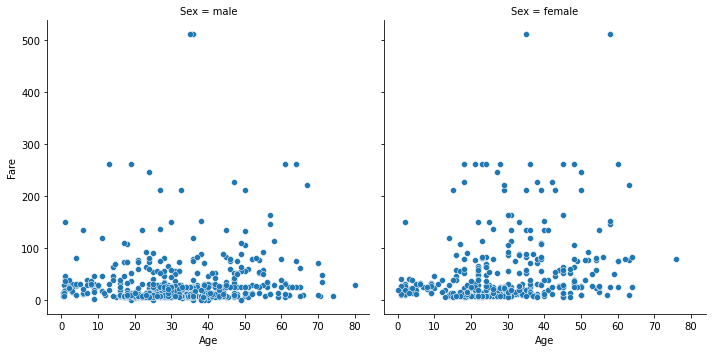

In [29]:
sns.relplot(data=df, x='Age', y='Fare', col='Sex')

## Analysis Hyphoteses
1. There is a lot of outliers especially in fare
2. Females have higher survival rates than males
3. Pclass with the largest capacity is 3, However, it also has the highest numbers of dead passenger while the distribution of survived passengers in other classes pretty much the same
4. Cabin C and B have the highest number of survivals
5. Distribution for SibSp is identical to Parch
6. The median fare of people who survived is way higher than those who passed away (this is kinda sad)
7. Mean age for both categories are almost the same
8. Pclass 1 has the greates fare distribution which I could assume it's the most luxurious class among the other
9. Age and fare doesn't seem to have a significant correlation

In [30]:
df

,PassengerId,Name,Sex,Age,Ticket,Fare,Pclass,Embarked,SibSp,Parch,Cabin,CabinLetter,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,3,S,1,0,NaN,NaN,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1,C,1,0,C85,C,1.0
2,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,3,S,0,0,NaN,NaN,1.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1,S,1,0,C123,C,1.0
4,5,"Allen, Mr. William Henry",male,35.0,373450,8.0500,3,S,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,"Spector, Mr. Woolf",male,NaN,A.5. 3236,8.0500,3,S,0,0,NaN,NaN,NaN
1305,1306,"Oliva y Ocana, Dona. Fermina",female,39.0,PC 17758,108.9000,1,C,0,0,C105,C,NaN
1306,1307,"Saether, Mr. Simon Sivertsen",male,38.5,SOTON/O.Q. 3101262,7.2500,3,S,0,0,NaN,NaN,NaN
1307,1308,"Ware, Mr. Frederick",male,NaN,359309,8.0500,3,S,0,0,NaN,NaN,NaN


# Feature Engineering

In [31]:
class FE: 
    def __init__(self, dataframe, columns):
        self.dataframe = dataframe
        self.columns = columns
        
    def convert_cat_vals(self):
        le = LabelEncoder()
        
        for column in self.columns:
            self.dataframe[column] = le.fit_transform(self.dataframe[column])
        
        return self.dataframe
    
    def fillna(self):
#       Fill nan values with median
        median_age = self.dataframe.Age.median()
        self.dataframe.Age = self.dataframe.Age.fillna(median_age)
        
        median_fare = self.dataframe.Fare.median()
        self.dataframe.Fare = self.dataframe.Fare.fillna(median_fare)
        
        return self.dataframe
    
fe = FE(df, ['Sex', 'Pclass', 'Embarked'])
fe.convert_cat_vals()
df = fe.fillna()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Name         1309 non-null   object 
 2   Sex          1309 non-null   int32  
 3   Age          1309 non-null   float64
 4   Ticket       1309 non-null   object 
 5   Fare         1309 non-null   float64
 6   Pclass       1309 non-null   int64  
 7   Embarked     1309 non-null   int32  
 8   SibSp        1309 non-null   int64  
 9   Parch        1309 non-null   int64  
 10  Cabin        295 non-null    object 
 11  CabinLetter  295 non-null    object 
 12  Survived     891 non-null    float64
dtypes: float64(3), int32(2), int64(4), object(4)
memory usage: 122.8+ KB


# Data Preprocessing

In [33]:
train_df = df[df.Survived.isna() == False]
test_df = df[df.Survived.isna()].drop('Survived', axis=1)

In [45]:
# I exclude Cabin since there's too many nan values
features = ['Sex', 'Age', 'Pclass', 'SibSp']

In [46]:
x = train_df[features]
y = train_df['Survived']

In [47]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2 ,random_state=1)

### K-NN

Determine the best n_neighbors

In [51]:
accuracies = list()
k_range = 30

for n in range(1,k_range):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_x, train_y)
    knn_pred = knn.predict(test_x)
    
    accuracies.append(accuracy_score(test_y, knn_pred))

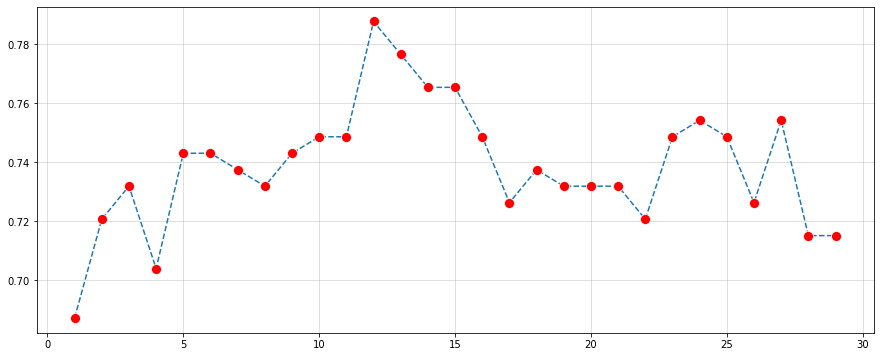

In [62]:
plt.figure(figsize=(15,6))
sns.lineplot(x=[i for i in range(1,k_range)], y=accuracies, linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.grid(alpha=0.5)

The highest accuracy was achieved by 12 neighbors

In [72]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=12)

In [73]:
knn_pred = knn.predict(test_x)
knn_pred

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1.])

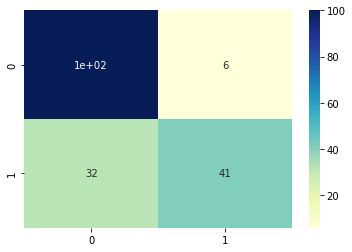

In [74]:
cm = confusion_matrix(test_y, knn_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

In [107]:
print(f'K-NN Accuracy: {accuracy_score(test_y, knn_pred)}\n')
print(f'K-NN Classification Report:\n\n {classification_report(test_y, knn_pred)}')

K-NN Accuracy: 0.7877094972067039

K-NN Classification Report:

               precision    recall  f1-score   support

         0.0       0.76      0.94      0.84       106
         1.0       0.87      0.56      0.68        73

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.76       179
weighted avg       0.80      0.79      0.78       179



### Logistic Regression

In [84]:
logistic = LogisticRegression()
logistic.fit(train_x, train_y)

LogisticRegression()

In [86]:
logistic_pred = logistic.predict(test_x)
logistic_pred

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1.])

<AxesSubplot:>

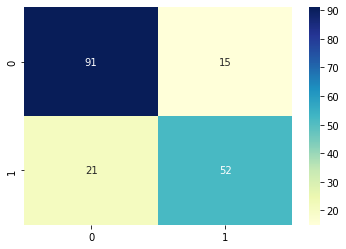

In [88]:
cm = confusion_matrix(test_y, logistic_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [108]:
print(f'Logistic Regression Accuracy: {accuracy_score(test_y, logistic_pred)}\n')
print(f'Logistic Regression Classification Report:\n\n {classification_report(test_y, logistic_pred)}')

Logistic Regression Accuracy: 0.7988826815642458

Logistic Regression Classification Report:

               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       106
         1.0       0.78      0.71      0.74        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Support Vector Machine

In [100]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [104]:
forest_pred = forest.predict(test_x)
forest_pred

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1.])

<AxesSubplot:>

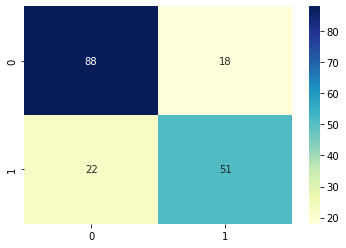

In [105]:
cm = confusion_matrix(test_y, forest_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")

In [111]:
print(f'SVM Accuracy:{accuracy_score(test_y, forest_pred)}\n')
print(f'SVM Classification Report:\n\n{classification_report(test_y, forest_pred)}')

SVM Accuracy:0.776536312849162

SVM Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       106
         1.0       0.74      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

